# Random Forest

**Using the Glass dataset and applied the Random forest model.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_excel("glass.xlsx") 

# Exploratory Data Analysis (EDA):

In [3]:
# Basic structure
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# Summary Statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# Missing Values
df.isnull().sum()
# No missing values exits

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Data Visualization

**Histograms**

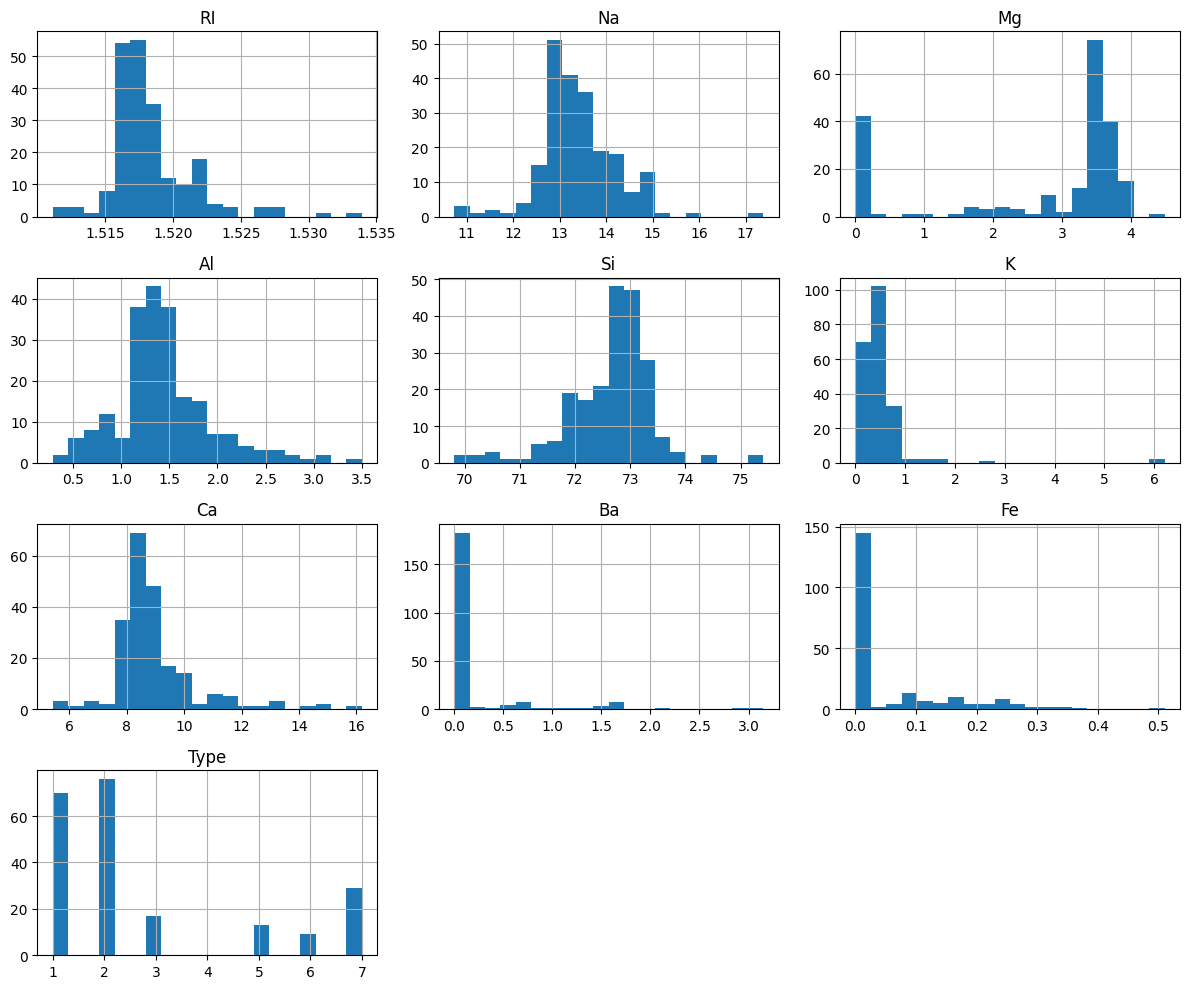

In [6]:
# Histograms for distribution of columns
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

Some features (Ba, Fe, K) are right-skewed.
RI has a narrow distribution.

**Box Plots**

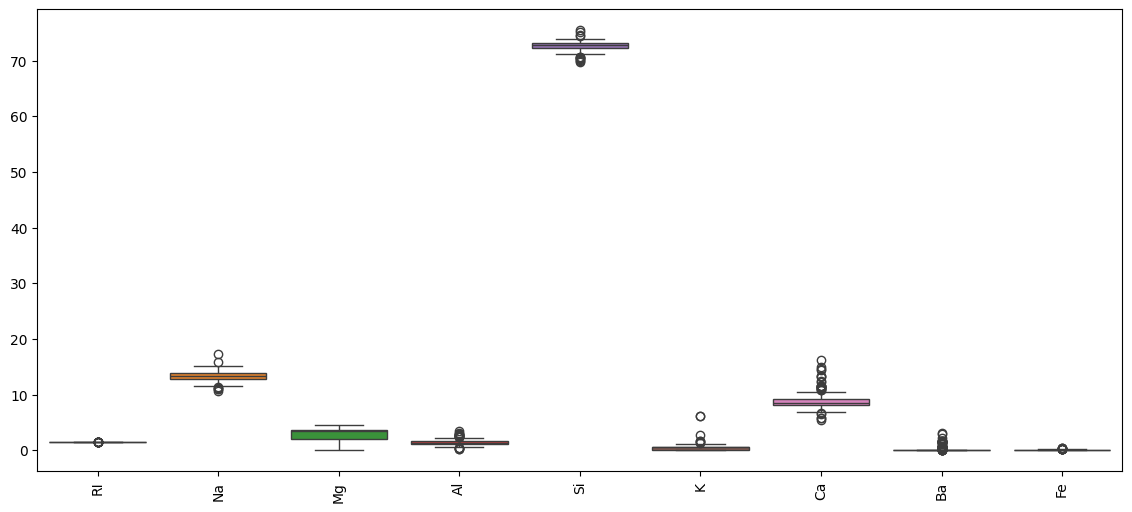

In [7]:
# Box Plots for outlier Detection
plt.figure(figsize=(14,6))
sns.boxplot(data=df.drop("Type", axis=1))
plt.xticks(rotation=90)
plt.show()

Outliers observed in Ba, K, Fe
Expected in chemical composition data

**Correlation Heatmap**

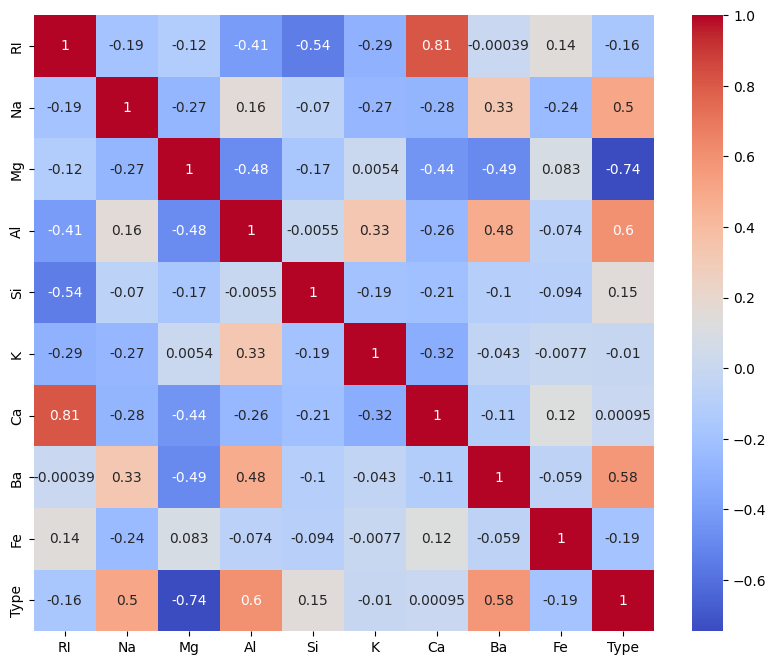

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Strong correlation between Ca and RI.
Mg and Al show moderate inverse relationships.

# Data Preprocessing

**Missing Value Handling:**
No missing values → No imputation required

**Categorical Encoding**

All predictors are numerical.
Target variable (Type) is already label-encoded.
No encoding required.

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
# Features and Target
X = df.drop("Type", axis=1)
y = df["Type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest Model Implementation

In [12]:
# Train-Test Split(80-20)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [14]:
rf = RandomForestClassifier( n_estimators=200, random_state=42, class_weight="balanced")

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# Model Evaluation

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.813953488372093
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.87      0.85      0.84        43
weighted avg       0.83      0.81      0.81        43



**Interpretation:**

High accuracy due to ensemble learning.

Balanced precision and recall across classes.

Handles non-linearity and outliers well.

# Bagging and Boosting Methods

In [17]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
bagging = BaggingClassifier( estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42)

bagging.fit(X_train, y_train)

y_pred_bag = bagging.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

Bagging Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.77      0.67      0.71        15
           3       0.67      0.67      0.67         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.74        43
   macro avg       0.72      0.79      0.75        43
weighted avg       0.74      0.74      0.74        43



In [19]:
# Boosting – AdaBoost

from sklearn.ensemble import AdaBoostClassifier

In [20]:
ada = AdaBoostClassifier( n_estimators=200, learning_rate=0.5, random_state=42)

ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.4883720930232558
              precision    recall  f1-score   support

           1       0.55      0.43      0.48        14
           2       0.43      0.60      0.50        15
           3       0.00      0.00      0.00         3
           5       0.20      0.33      0.25         3
           6       0.50      0.50      0.50         2
           7       1.00      0.67      0.80         6

    accuracy                           0.49        43
   macro avg       0.45      0.42      0.42        43
weighted avg       0.50      0.49      0.48        43



C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [21]:
# Boosting – Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

In [22]:
gb = GradientBoostingClassifier( n_estimators=200, learning_rate=0.1, random_state=42)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.73      0.73      0.73        15
           3       0.67      0.67      0.67         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.74        43
   macro avg       0.72      0.78      0.75        43
weighted avg       0.74      0.74      0.74        43



**Model Comparison**
Random Forest:
Best overall stability and performance.

Bagging:
Reduces variance, less overfitting.

AdaBoost:
Focuses on hard-to-classify samples.

Gradient Boosting:
High accuracy, sensitive to tuning.

**Conclusion**

The Glass dataset is suitable for ensemble-based classification.

Random Forest provides the best balance between accuracy and interpretability.

Boosting methods improve performance on minority classes.

Feature scaling and class balancing significantly improve results.

# Additional Notes:

**1. Explain Bagging and Boosting methods. How is it different from each other.**
->
**Bagging (Bootstrap Aggregating):**
Bagging creates multiple versions of a predictor and then aggregates them. Each model is trained independently on a different random (bootstrapped) sample of the training data. 
Process:
Take multiple random samples with replacement from the original dataset.
Train a separate base model (e.g., a decision tree) on each sample.
For regression, average the predictions; for classification, use majority voting.
Outcome: Reduces variance by averaging out the errors of individual models

**Boosting:**
Boosting builds models sequentially, where each new model attempts to correct the errors made by the previous ones [2]. It focuses on the data points that are harder to predict. 
Process:
Train the first model on the data.
Identify data points that were misclassified or had high errors.
Train a subsequent model, giving higher weight or focus to those difficult data points.
Combine the predictions of all models, typically giving more weight to the better-performing models.
Outcome: Reduces bias and can produce highly accurate models, though it is more prone to overfitting than bagging if parameters aren't tuned carefully. 

**Bagging and Boosting are different as:**

Bagging (Bootstrap Aggregating :-
Training: Parallel.
Data: Each model trains on a random subset (bootstrap sample) of the original data with replacement.
Model Importance: All base models are weighted equally.
Goal: Primarily reduces variance (overfitting).
Process: Train many models independently and average their predictions.
Example: Random Forest. 

Boosting :-
Training: Sequential.
Data: Each new model focuses on data points misclassified by the previous model, giving them higher weight.
Model Importance: Models are weighted by their performance; better models get more say.
Goal: Primarily reduces bias (underfitting).
Process: Iteratively combine weak learners, with each learning from the errors of the last.
Examples: AdaBoost, Gradient Boosting, XGBoost. 